In [ ]:
import plotly.graph_objects as go
import numpy as np


def RungeKutta(f, y0, x):
    y = np.zeros((len(x), len(y0)))
    y[0, :] = np.array(y0)
    h = x[1] - x[0]
    for i in range(0, len(x) - 1):
        # Many slight changes below
        k1 = np.array(f(y[i, :], x[i]))
        k2 = np.array(f(y[i, :] + h * k1 / 2, x[i] + h / 2))
        k3 = np.array(f(y[i, :] + h * k2 / 2, x[i] + h / 2))
        k4 = np.array(f(y[i, :] + h * k3, x[i] + h))
        y[i + 1, :] = y[i, :] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


# A constant function in your case, but this can be any function of `t`
def applied_force(t):
    # Note, you did not provide a value for `omega0`
    return omega0 ** 2


def rk_derivative_factory(osc, F):
    return lambda X, t: np.array([X[1], (F(t) - osc.c * X[1] - osc.k * X[0]) / osc.m])


class HarmonicOscillator:
    def __init__(self, m, c, k):
        if (type(m) in (int, float)) and (m > 0):
            self.m = m
        else:
            raise ValueError("Parameter 'm' must be a positive number")
        if (type(c) in (int, float)) and (c > 0):
            self.c = c
        else:
            raise ValueError("Parameter 'c' must be a positive number")
        if (type(k) in (int, float)) and (k > 0):
            self.k = k
        else:
            raise ValueError("Parameter 'k' must be a positive number")

        self.T = 2 * np.pi * (self.m / self.k)**(0.5)

    def period(self):
        return self.T

    def solve(self, func, y0):
        t = np.linspace(0, 10 * self.period(), 1000)
        return RungeKutta(func, y0, t)


omega0 = 0.234
m, c, k = 1, 0.25, 2
oscillator = HarmonicOscillator(m, c, k)

f = rk_derivative_factory(oscillator, applied_force)
x_osc = oscillator.solve(f, [1, 0])

x, dx = x_osc.T
t = np.linspace(0, 10 * oscillator.period(), 1000)

fig = go.Figure(go.Scatter(x=t, y=x, name="x(t)"))
fig.add_trace(go.Scatter(x=t, y=dx, name="x'(t)"))


In [1]:
from library.DIY import *

In [2]:
pic = "monkey"
img = GrayscaleImageSVD(f"static/{pic}.jpg")

c:\Users\amukh\OneDrive\Desktop\P346\working\library\DIY.py:11: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(e_val)


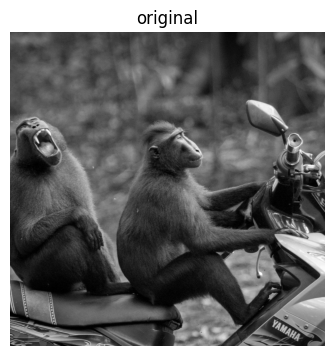

In [3]:
img.display("original")

ratio = 14.711288927335639
error = 4.08615462538192


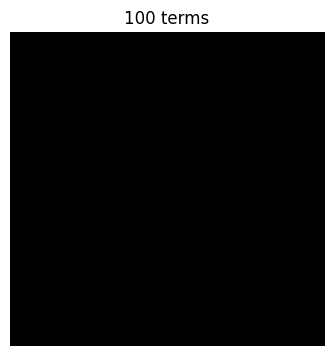

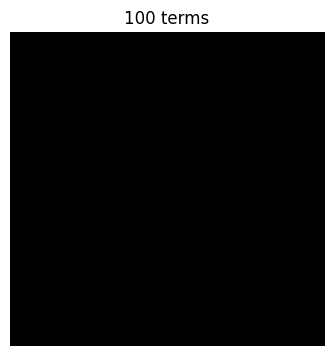

In [5]:
A, ratio, error = img.reduce(terms = 100)
print(f"{ratio = }")
print(f"{error = }")
show_image(A, "100 terms")